# ETL

In [23]:
import pandas as pd
from pandas import json_normalize
import numpy as np                  
import json as js
import ast as ast

In [24]:
credits_df = pd.read_csv("credits.csv")
credits_df         

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [25]:
movies_df = pd.read_csv("movies_dataset.csv")
movies_df


C:\Users\malen\AppData\Local\Temp\ipykernel_22548\1154184958.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("movies_dataset.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [26]:
movies_df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [27]:
# Limpiar y acondicionar movies_df

def safe_eval(x):
    if pd.isna(x) or x == '[]' or x == '{}':
        return []
    try:
        return ast.literal_eval(str(x))
    except:
        return []

# Procesar belongs_to_collection ('collection_name')
def extract_collection_name(x):
    if pd.isna(x) or x == '[]' or x == '{}':
        return None
    try:
        collection = safe_eval(x)
        return collection.get('name') if isinstance(collection, dict) else None
    except:
        return None

# Procesar los géneros
def extract_genres(x):
    if pd.isna(x) or x == '[]':
        return []
    try:
        genres = safe_eval(x)
        return [genre['name'] for genre in genres] if isinstance(genres, list) else []
    except:
        return []

# Procesar compañías de manera segura
def extract_companies(x):
    if pd.isna(x) or x == '[]':
        return []
    try:
        companies = safe_eval(x)
        return [company['name'] for company in companies] if isinstance(companies, list) else []
    except:
        return []




In [28]:
# Aplicar las transformaciones
movies_df['collection_name'] = movies_df['belongs_to_collection'].apply(extract_collection_name)
movies_df['genres_names'] = movies_df['genres'].apply(extract_genres)
movies_df['production_companies_names'] = movies_df['production_companies'].apply(extract_companies)

# Limpiar los datos numéricos
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')
movies_df['runtime'] = pd.to_numeric(movies_df['runtime'], errors='coerce')

# Convertir las fechas
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

# Limpiar valores nulos en columnas críticas
movies_df = movies_df.dropna(subset=['title', 'release_date'])

# Rellenar valores nulos en budget y revenue
movies_df['budget'] = movies_df['budget'].fillna(0)
movies_df['revenue'] = movies_df['revenue'].fillna(0)

# Eliminar duplicados
movies_df = movies_df.drop_duplicates(subset=['title', 'release_date'])

# Convertir la columna 'release_date' a formato datetime, manejando errores y valores nulos
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

# Crear dataset limpio con las columnas relevantes
#Elimino la columna 'collection_name' porque tiene demasiados valores nulos. 

movies_clean_df = movies_df[[ 
    'id', 'title', 'genres_names',
    'release_date', 'budget', 'revenue', 'runtime', 'vote_average',
    'vote_count', 'production_companies_names', 'original_language'
]].copy()  # Hacer una copia explícita

# Reemplazar valores nulos en listas vacías por [] usando .loc
movies_clean_df.loc[:, 'genres_names'] = movies_clean_df['genres_names'].apply(lambda x: x if isinstance(x, list) else [])
movies_clean_df.loc[:, 'production_companies_names'] = movies_clean_df['production_companies_names'].apply(lambda x: x if isinstance(x, list) else [])

# Crear columna release_year
movies_clean_df['release_year'] = movies_clean_df['release_date'].dt.year

# Eliminar columnas no utilizadas (con errores ignorados si no existen)
movies_clean_df = movies_clean_df.drop(columns=['video', 'imdb_id', 'adult', 'original_title', 'poster_path', 'homepage'], errors='ignore')

print("Dimensiones del dataset limpio:", movies_clean_df.shape)
print("\nMuestra del dataset limpio:")
print(movies_clean_df.head())

# Guardar el dataset limpio
movies_clean_df.to_csv('movies_dataset_clean.csv', index=False)
print("\nDataset limpio guardado como 'movies_dataset_clean.csv'")


C:\Users\malen\AppData\Local\Temp\ipykernel_22548\1173953292.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['budget'] = movies_df['budget'].fillna(0)
C:\Users\malen\AppData\Local\Temp\ipykernel_22548\1173953292.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['revenue'] = movies_df['revenue'].fillna(0)


Dimensiones del dataset limpio: (45346, 12)

Muestra del dataset limpio:
      id                        title                  genres_names  \
0    862                    Toy Story   [Animation, Comedy, Family]   
1   8844                      Jumanji  [Adventure, Fantasy, Family]   
2  15602             Grumpier Old Men             [Romance, Comedy]   
3  31357            Waiting to Exhale      [Comedy, Drama, Romance]   
4  11862  Father of the Bride Part II                      [Comedy]   

  release_date      budget      revenue  runtime  vote_average  vote_count  \
0   1995-10-30  30000000.0  373554033.0     81.0           7.7      5415.0   
1   1995-12-15  65000000.0  262797249.0    104.0           6.9      2413.0   
2   1995-12-22         0.0          0.0    101.0           6.5        92.0   
3   1995-12-22  16000000.0   81452156.0    127.0           6.1        34.0   
4   1995-02-10         0.0   76578911.0    106.0           5.7       173.0   

                          produ

In [29]:
movies_clean_df.isnull().sum()

id                              0
title                           0
genres_names                    0
release_date                    0
budget                          0
revenue                         0
runtime                       246
vote_average                    0
vote_count                      0
production_companies_names      0
original_language              11
release_year                    0
dtype: int64

In [30]:
df_movies_limpio =  pd.read_csv("movies_dataset_clean.csv")
df_movies_limpio

,id,title,genres_names,release_date,budget,revenue,runtime,vote_average,vote_count,production_companies_names,original_language,release_year
0,862,Toy Story,"['Animation', 'Comedy', 'Family']",1995-10-30,30000000.0,373554033.0,81.0,7.7,5415.0,['Pixar Animation Studios'],en,1995
1,8844,Jumanji,"['Adventure', 'Fantasy', 'Family']",1995-12-15,65000000.0,262797249.0,104.0,6.9,2413.0,"['TriStar Pictures', 'Teitler Film', 'Intersco...",en,1995
2,15602,Grumpier Old Men,"['Romance', 'Comedy']",1995-12-22,0.0,0.0,101.0,6.5,92.0,"['Warner Bros.', 'Lancaster Gate']",en,1995
3,31357,Waiting to Exhale,"['Comedy', 'Drama', 'Romance']",1995-12-22,16000000.0,81452156.0,127.0,6.1,34.0,['Twentieth Century Fox Film Corporation'],en,1995
4,11862,Father of the Bride Part II,['Comedy'],1995-02-10,0.0,76578911.0,106.0,5.7,173.0,"['Sandollar Productions', 'Touchstone Pictures']",en,1995
...,...,...,...,...,...,...,...,...,...,...,...,...
45341,30840,Robin Hood,"['Drama', 'Action', 'Romance']",1991-05-13,0.0,0.0,104.0,5.7,26.0,"['Westdeutscher Rundfunk (WDR)', 'Working Titl...",en,1991
45342,111109,Century of Birthing,['Drama'],2011-11-17,0.0,0.0,360.0,9.0,3.0,['Sine Olivia'],tl,2011
45343,67758,Betrayal,"['Action', 'Drama', 'Thriller']",2003-08-01,0.0,0.0,90.0,3.8,6.0,['American World Pictures'],en,2003
45344,227506,Satan Triumphant,[],1917-10-21,0.0,0.0,87.0,0.0,0.0,['Yermoliev'],en,1917


In [31]:
# Desanidar las columnas 'cast' y 'crew'

def flatten_column(credits_df, column_name):
    # Convertir la columna de strings a listas de diccionarios
    credits_df[column_name] = credits_df[column_name].apply(ast.literal_eval)
    
    # Expandir cada diccionario en columnas
    credits_df_expanded = credits_df[column_name].apply(pd.Series)
    
    # Concatenar las columnas expandidas con el dataframe original
    credits_df = pd.concat([credits_df.drop(columns=[column_name]), credits_df_expanded], axis=1)
    return credits_df

# Aplicar la función a las columnas 'cast' y 'crew'
df_cast_flattened = flatten_column(credits_df, 'cast')
df_crew_flattened = flatten_column(credits_df, 'crew')

# Mostrar las primeras filas del nuevo dataset
print(df_cast_flattened.head())
print(df_crew_flattened.head())

                                                crew     id  \
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862   
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844   
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602   
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357   
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862   

                                                   0  \
0  {'cast_id': 14, 'character': 'Woody (voice)', ...   
1  {'cast_id': 1, 'character': 'Alan Parrish', 'c...   
2  {'cast_id': 2, 'character': 'Max Goldman', 'cr...   
3  {'cast_id': 1, 'character': 'Savannah 'Vannah'...   
4  {'cast_id': 1, 'character': 'George Banks', 'c...   

                                                   1  \
0  {'cast_id': 15, 'character': 'Buzz Lightyear (...   
1  {'cast_id': 8, 'character': 'Samuel Alan Parri...   
2  {'cast_id': 3, 'character': 'John Gustafson', ...   
3  {'cast_id': 2, 'character': 'Bernadine 'Bernie...   
4  {

In [32]:
# Limpiar y estructurar las columnas del dataset

def clean_flattened_df(credits_df):
    # Renombrar las columnas de acuerdo a su contenido
    new_columns = {}
    for col in credits_df.columns:
        if isinstance(col, int):
            new_columns[col] = 'cast_' + str(col)
        else:
            new_columns[col] = col
    credits_df.rename(columns=new_columns, inplace=True)
    return credits_df

# Limpiar los dataframes desanidados
df_cast_cleaned = clean_flattened_df(df_cast_flattened)
df_crew_cleaned = clean_flattened_df(df_crew_flattened)

# Mostrar las primeras filas del dataset limpio
print(df_cast_cleaned.head())
print(df_crew_cleaned.head())

                                                crew     id  \
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862   
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844   
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602   
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357   
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862   

                                              cast_0  \
0  {'cast_id': 14, 'character': 'Woody (voice)', ...   
1  {'cast_id': 1, 'character': 'Alan Parrish', 'c...   
2  {'cast_id': 2, 'character': 'Max Goldman', 'cr...   
3  {'cast_id': 1, 'character': 'Savannah 'Vannah'...   
4  {'cast_id': 1, 'character': 'George Banks', 'c...   

                                              cast_1  \
0  {'cast_id': 15, 'character': 'Buzz Lightyear (...   
1  {'cast_id': 8, 'character': 'Samuel Alan Parri...   
2  {'cast_id': 3, 'character': 'John Gustafson', ...   
3  {'cast_id': 2, 'character': 'Bernadine 'Bernie...   
4  {

In [33]:
# Definir la función safe_len
def safe_len(x):
    return len(x) if isinstance(x, list) else 0

# Eliminar IDs duplicados y crear una copia del DataFrame
unique_credits_df = credits_df.drop_duplicates(subset='id').copy()

# Procesar los datos de 'cast' y 'crew' para contar miembros por película
unique_credits_df.loc[:, 'num_cast'] = unique_credits_df['cast'].apply(safe_len)
unique_credits_df.loc[:, 'num_crew'] = unique_credits_df['crew'].apply(safe_len)

# Mostrar el número de filas después de eliminar duplicados
print("Número de filas después de eliminar duplicados:", unique_credits_df.shape[0])

# Mostrar las primeras filas del DataFrame procesado
print(unique_credits_df.head())




Número de filas después de eliminar duplicados: 45432
                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': 'Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  num_cast  \
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862        13   
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844        26   
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602         7   
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357        10   
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862        12   

   num_crew  
0       106  
1        16  
2         4  
3        10  
4         7  


In [34]:
# Leer el archivo y convertir las cadenas JSON usando ast.literal_eval
credits_df = pd.read_csv('credits.csv')
credits_df['cast'] = credits_df['cast'].apply(ast.literal_eval)
credits_df['crew'] = credits_df['crew'].apply(ast.literal_eval)

# Mostrar un resumen básico
print("Total de películas:", len(credits_df))
print("\
Ejemplo del primer elenco:")
print("Película ID:", credits_df['id'].iloc[0])
print("Número de actores:", len(credits_df['cast'].iloc[0]))
print("Primer actor:", credits_df['cast'].iloc[0][0]['name'], "como", credits_df['cast'].iloc[0][0]['character'])

Total de películas: 45476
Ejemplo del primer elenco:
Película ID: 862
Número de actores: 13
Primer actor: Tom Hanks como Woody (voice)


In [35]:
df_credits_limpio =  pd.read_csv("credits_limpio.csv")
df_credits_limpio

,id,cast_procesado,crew_procesado
0,862,"[{'nombre': 'Tom Hanks', 'personaje': 'Woody (...","[{'nombre': 'John Lasseter', 'trabajo': 'Direc..."
1,8844,"[{'nombre': 'Robin Williams', 'personaje': 'Al...","[{'nombre': 'Larry J. Franco', 'trabajo': 'Exe..."
2,15602,"[{'nombre': 'Walter Matthau', 'personaje': 'Ma...","[{'nombre': 'Howard Deutch', 'trabajo': 'Direc..."
3,31357,"[{'nombre': 'Whitney Houston', 'personaje': ""S...","[{'nombre': 'Forest Whitaker', 'trabajo': 'Dir..."
4,11862,"[{'nombre': 'Steve Martin', 'personaje': 'Geor...","[{'nombre': 'Alan Silvestri', 'trabajo': 'Orig..."
...,...,...,...
45471,439050,"[{'nombre': 'Leila Hatami', 'personaje': '', '...","[{'nombre': 'Hamid Nematollah', 'trabajo': 'Di..."
45472,111109,"[{'nombre': 'Angel Aquino', 'personaje': 'Sist...","[{'nombre': 'Lav Diaz', 'trabajo': 'Director',..."
45473,67758,"[{'nombre': 'Erika Eleniak', 'personaje': 'Emi...","[{'nombre': 'Mark L. Lester', 'trabajo': 'Dire..."
45474,227506,"[{'nombre': 'Iwan Mosschuchin', 'personaje': '...","[{'nombre': 'Yakov Protazanov', 'trabajo': 'Di..."


## EDA

In [36]:
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 
import numpy as np


In [37]:
#por cuestion de espacio voy a reducir el data set a 25000 entradas.

# Me aseguro de que 'vote_count' esté en formato numérico
df_movies_limpio['vote_count'] = pd.to_numeric(df_movies_limpio['vote_count'], errors='coerce')

# Filtrar las 25,000 películas más populares basadas en 'vote_count'
df_movies_reducido = df_movies_limpio.nlargest(25000, 'vote_count')

# Mostrar tamaño final
print(f"Tamaño df_movies_reducido: {df_movies_reducido.shape}")

# Guardar el dataframe como un archivo CSV
df_movies_reducido.to_csv('df_movies_reducido.csv', index=False)


Tamaño df_movies_reducido: (25000, 12)


In [38]:
df_movies_reducido =  pd.read_csv("df_movies_reducido.csv")
df_movies_reducido

,id,title,genres_names,release_date,budget,revenue,runtime,vote_average,vote_count,production_companies_names,original_language,release_year
0,27205,Inception,"['Action', 'Thriller', 'Science Fiction', 'Mys...",2010-07-14,160000000.0,8.255328e+08,148.0,8.1,14075.0,"['Legendary Pictures', 'Warner Bros.', 'Syncopy']",en,2010
1,155,The Dark Knight,"['Drama', 'Action', 'Crime', 'Thriller']",2008-07-16,185000000.0,1.004558e+09,152.0,8.3,12269.0,"['DC Comics', 'Legendary Pictures', 'Warner Br...",en,2008
2,19995,Avatar,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",2009-12-10,237000000.0,2.787965e+09,162.0,7.2,12114.0,"['Ingenious Film Partners', 'Twentieth Century...",en,2009
3,24428,The Avengers,"['Science Fiction', 'Action', 'Adventure']",2012-04-25,220000000.0,1.519558e+09,143.0,7.4,12000.0,"['Paramount Pictures', 'Marvel Studios']",en,2012
4,293660,Deadpool,"['Action', 'Adventure', 'Comedy']",2016-02-09,58000000.0,7.831130e+08,108.0,7.4,11444.0,"['Twentieth Century Fox Film Corporation', 'Ma...",en,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,46278,Iphigenia,"['Action', 'Drama', 'Foreign']",1977-09-10,0.0,0.000000e+00,127.0,6.6,8.0,[],el,1977
24996,48885,The Gruesome Twosome,"['Comedy', 'Horror']",1967-08-28,0.0,0.000000e+00,72.0,5.3,8.0,[],en,1967
24997,33057,Alvin Purple,['Comedy'],1973-12-20,0.0,0.000000e+00,95.0,5.4,8.0,[],en,1973
24998,45133,Sebbe,['Drama'],2010-03-12,0.0,0.000000e+00,83.0,5.9,8.0,[],sv,2010


In [39]:
# Filtrar las 25,000 entradas más relevantes 
df_credits_limpio = df_credits_limpio.drop_duplicates(subset=['id'])

# Asegúrate de quedarte con un máximo de 25,000 entradas
df_credits_reducido = df_credits_limpio.nlargest(25000, 'id')  # Usando 'id' como ejemplo

# Mostrar tamaños finales
print(f"Tamaño df_credits_reducido: {df_credits_reducido.shape}")

# Guardar el dataframe como un archivo CSV 
df_credits_reducido.to_csv('df_credits_reducido.csv', index=False)


Tamaño df_credits_reducido: (25000, 3)


In [40]:
df_credits_reducido =  pd.read_csv("df_credits_reducido.csv")
df_credits_reducido

,id,cast_procesado,crew_procesado
0,469172,"[{'nombre': 'Ruben de Freitas', 'personaje': '...","[{'nombre': 'Paulo Branco', 'trabajo': 'Produc..."
1,468707,"[{'nombre': 'Inka Haapamäki', 'personaje': 'Sa...","[{'nombre': 'Hannaleena Hauru', 'trabajo': 'Di..."
2,468343,[],"[{'nombre': 'Jack Witikka', 'trabajo': 'Direct..."
3,467731,"[{'nombre': 'Lloyd Bridges', 'personaje': 'Ale...","[{'nombre': 'Sidney Lumet', 'trabajo': 'Direct..."
4,465044,"[{'nombre': 'Karolina Antosik', 'personaje': '...","[{'nombre': 'Molly Smith', 'trabajo': 'Directo..."
...,...,...,...
24995,50761,"[{'nombre': 'Tony Randall', 'personaje': 'Andr...","[{'nombre': 'Harry Alan Towers', 'trabajo': 'P..."
24996,50759,"[{'nombre': 'Chishu Ryu', 'personaje': 'Shuhei...","[{'nombre': 'Yasujirō Ozu', 'trabajo': 'Screen..."
24997,50758,"[{'nombre': 'Tomás Milián', 'personaje': 'Nico...","[{'nombre': 'Bruno Corbucci', 'trabajo': 'Dire..."
24998,50754,[],"[{'nombre': 'Michael Apted', 'trabajo': 'Direc..."


In [41]:
# Primero me aseguro de que 'revenue' y 'budget' son de tipo numérico
df_movies_reducido['revenue'] = pd.to_numeric(df_movies_reducido['revenue'], errors='coerce')
df_movies_reducido['budget'] = pd.to_numeric(df_movies_reducido['budget'], errors='coerce')

# Creo la columna 'return' para calcular el ROI
df_movies_reducido['return'] = df_movies_reducido.apply(
    lambda row: row['revenue'] / row['budget'] if row['budget'] > 0 else 0, axis=1
)

# Rellenar los valores nulos en 'return' con 0
df_movies_reducido['return'] = df_movies_reducido['return'].fillna(0)

print(df_movies_reducido.head())
print(df_movies_reducido[['revenue', 'budget', 'return']].describe())
print("Cantidad de valores nulos en return:", df_movies_reducido['return'].isnull().sum())

       id            title                                       genres_names  \
0   27205        Inception  ['Action', 'Thriller', 'Science Fiction', 'Mys...   
1     155  The Dark Knight           ['Drama', 'Action', 'Crime', 'Thriller']   
2   19995           Avatar  ['Action', 'Adventure', 'Fantasy', 'Science Fi...   
3   24428     The Avengers         ['Science Fiction', 'Action', 'Adventure']   
4  293660         Deadpool                  ['Action', 'Adventure', 'Comedy']   

  release_date       budget       revenue  runtime  vote_average  vote_count  \
0   2010-07-14  160000000.0  8.255328e+08    148.0           8.1     14075.0   
1   2008-07-16  185000000.0  1.004558e+09    152.0           8.3     12269.0   
2   2009-12-10  237000000.0  2.787965e+09    162.0           7.2     12114.0   
3   2012-04-25  220000000.0  1.519558e+09    143.0           7.4     12000.0   
4   2016-02-09   58000000.0  7.831130e+08    108.0           7.4     11444.0   

                          produc

In [42]:
from collections import Counter
import ast
import pandas as pd
import numpy as np

# Cargar los datos
df_credits_reducido = pd.read_csv('credits.csv')

# Asegurarse de que las columnas 'cast' y 'crew' contengan listas
df_credits_reducido['cast'] = df_credits_reducido['cast'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
df_credits_reducido['crew'] = df_credits_reducido['crew'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Función para extraer directores del crew
def get_director(crew_list):
    for crew_member in crew_list:
        if crew_member.get('job') == 'Director':
            return crew_member.get('name', np.nan)
    return np.nan

# Obtener directores
df_credits_reducido['director'] = df_credits_reducido['crew'].apply(get_director)

# Obtener los actores principales (primeros 3) de cada película
def get_main_actors(cast_list, num_actors=3):
    return [actor['name'] for actor in cast_list[:num_actors]] if isinstance(cast_list, list) else []

df_credits_reducido['main_actors'] = df_credits_reducido['cast'].apply(get_main_actors)

# Análisis de directores más frecuentes
director_counts = df_credits_reducido['director'].value_counts().head(10)

print("Top 10 directores más prolíficos:")
print(director_counts)

# Análisis de actores más frecuentes
all_actors = [actor for actors_list in df_credits_reducido['main_actors'] for actor in actors_list]
top_actors = pd.Series(Counter(all_actors)).sort_values(ascending=False).head(10)

print("\nTop 10 actores más frecuentes (considerando roles principales):")
print(top_actors)

Top 10 directores más prolíficos:
director
John Ford           66
Michael Curtiz      65
Werner Herzog       54
Alfred Hitchcock    53
Georges Méliès      51
Woody Allen         49
Jean-Luc Godard     47
Sidney Lumet        46
Charlie Chaplin     44
Raoul Walsh         43
Name: count, dtype: int64

Top 10 actores más frecuentes (considerando roles principales):
John Wayne           106
Jackie Chan           89
Michael Caine         86
Robert De Niro        84
Gérard Depardieu      83
Christopher Lee       74
Nicolas Cage          71
Bette Davis           68
Samuel L. Jackson     67
James Mason           67
dtype: int64


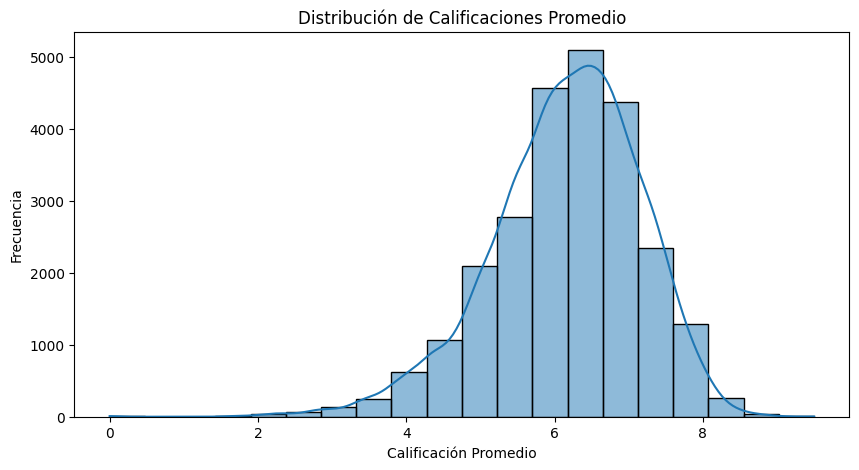

In [43]:
#Distribución de Calificaciones (vote_average)

plt.figure(figsize=(10, 5))
sns.histplot(df_movies_reducido['vote_average'], bins=20, kde=True)
plt.title('Distribución de Calificaciones Promedio')
plt.xlabel('Calificación Promedio')
plt.ylabel('Frecuencia')
plt.show()


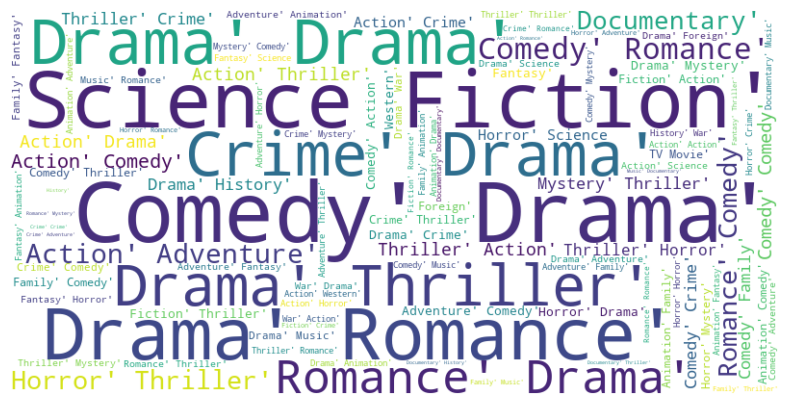

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenar todos los géneros en un solo string
text = " ".join(df_movies_reducido['genres_names'].dropna())

# Crear nube de palabras con los géneros 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', 
                      max_words=100).generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes
plt.show()
